# PREIZKUS IMPLEMENTACIJE - NALOGA 1: PREOBDELAVA

Za preizkus implementacije sem izbral 11 regij. V prvem delu sem 11 regij izrezal s pomočjo  orodja GIMP, v drugem delu sem pet izmed teh enajstih primerov izrezal tudi s pomočjo pythona.

#### IMPORTS

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import scipy.ndimage as ndimage

## ZAČETNA SLIKA

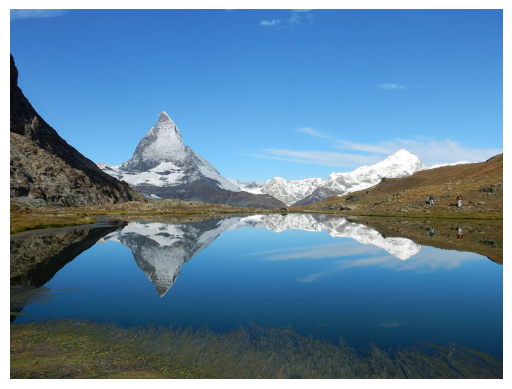

In [2]:
slika = plt.imread("./Landscape_test/LANDSCAPE_OG.jpg")
plt.figure()
plt.imshow(slika)
plt.axis("off")
plt.show()

In [4]:
slika.shape, slika.dtype

((683, 910, 3), dtype('uint8'))

## FUNKCIJA

In [8]:
def orientacija_horizonta(slika: np.ndarray) -> float:
    # Normalize the image if it's in uint8 format (0-255 range)
    if slika.dtype == np.uint8:
        slika = slika / 255.0

    image = slika.mean(2)
    sigma = 14
    velikost_jedra = int(2 * sigma)
    # koordinate jedra po x dimenziji
    x = np.arange(-velikost_jedra, velikost_jedra + 1)
    # koordinate jedra v obeh dimenzijah v 2d matrikah
    X, Y = np.meshgrid(x, x)
    jedro_tocke = np.array([X.ravel(), Y.ravel()])  # 2 x P
    C = np.eye(2) * 1 / sigma ** 2

    jedro_gauss = np.exp(-1 * (jedro_tocke.T.dot(C) * jedro_tocke.T).sum(1)).reshape(X.shape)
    slika_conv = ndimage.convolve(image, jedro_gauss, mode="nearest", cval=0.0)

    jedro_sobel_dx = np.array([
        [-1, 0, 1],
        [-2, 0, 2],
        [-1, 0, 1]
    ])
    jedro_sobel_dy = jedro_sobel_dx.T

    slika_dx = ndimage.convolve(slika_conv, jedro_sobel_dx, mode='nearest', cval=0.0)
    slika_dy = ndimage.convolve(slika_conv, jedro_sobel_dy, mode='nearest', cval=0.0)

    slika_rob_mag = (slika_dx ** 2 + slika_dy ** 2) ** 0.5  # samo pitagorov izrek
    slika_rob_smer = np.arctan2(slika_dy, slika_dx)

    hist_bins = np.linspace((-np.pi) / 2, (np.pi) / 2, 80)
    hist_smeri, bin_edges = np.histogram(slika_rob_smer, bins=hist_bins, weights=slika_rob_mag)
    max_bin_index = np.argmax(hist_smeri)
    # Compute the corresponding orientation value (average of the bin)
    horizon_orientation = ((bin_edges[max_bin_index] + bin_edges[max_bin_index + 1]) / 2)

    if abs(horizon_orientation) <= np.pi / 8:
        if horizon_orientation > 0:
            horizon_orientation += np.pi / 4
        else:
            horizon_orientation -= np.pi / 4
    else:
        if horizon_orientation < 0:
            horizon_orientation += np.pi / 2
        else:
            horizon_orientation -= np.pi / 2

    return horizon_orientation

## PRIMER 1 EXP: PI/4 = 0.785

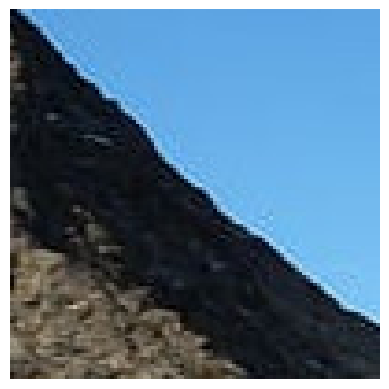

In [6]:
slika1 = plt.imread("./Landscape_test/primer_1.jpg")
plt.figure()
plt.imshow(slika1)
plt.axis("off")
plt.show()

In [7]:
slika1.shape, slika1.dtype

((100, 100, 3), dtype('uint8'))

In [8]:
orientacija_horizonta(slika1)

0.5766214364183798

## PRIMER 2 EXP: PI/4 = 0.785

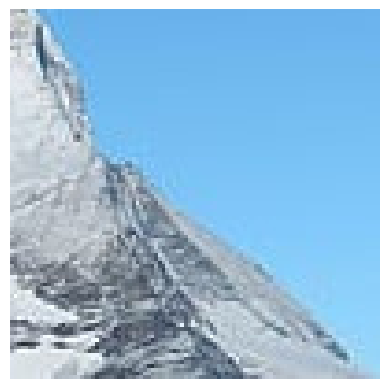

In [9]:
slika2 = plt.imread("./Landscape_test/primer_2.jpg")
plt.figure()
plt.imshow(slika2)
plt.axis("off")
plt.show()

In [10]:
orientacija_horizonta(slika2)

0.9742913925689866

## PRIMER 3 EXP: 0

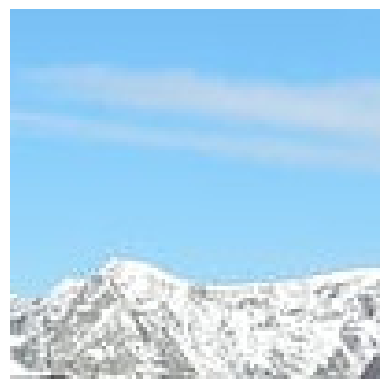

In [11]:
slika3 = plt.imread("./Landscape_test/primer_3.jpg")
plt.figure()
plt.imshow(slika3)
plt.axis("off")
plt.show()

In [19]:
orientacija_horizonta(slika3)

0.019883497807530404

## PRIMER 4 EXP: -PI/4 = -0,785 ali 0

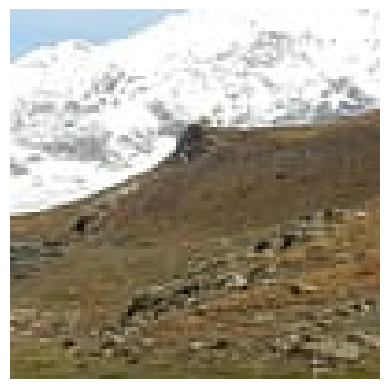

In [12]:
slika4 = plt.imread("./Landscape_test/primer_4.jpg")
plt.figure()
plt.imshow(slika4)
plt.axis("off")
plt.show()

In [20]:
orientacija_horizonta(slika4)

-0.13918448465271216

## PRIMER 5 EXP: 0

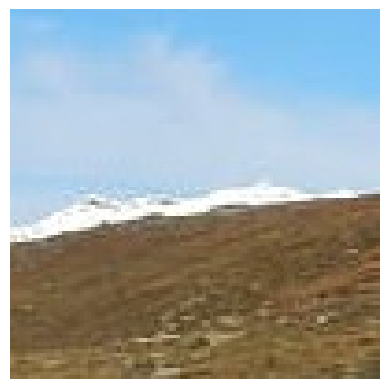

In [13]:
slika5 = plt.imread("./Landscape_test/primer_5.jpg")
plt.figure()
plt.imshow(slika5)
plt.axis("off")
plt.show()

In [21]:
orientacija_horizonta(slika5)

-0.09941748903765157

## PRIMER 6 EXP: 0

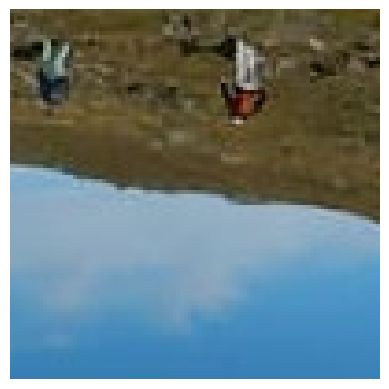

In [14]:
slika6 = plt.imread("./Landscape_test/primer_6.jpg")
plt.figure()
plt.imshow(slika6)
plt.axis("off")
plt.show()

In [22]:
orientacija_horizonta(slika6)

0.13918448465271238

## PRIMER 7 EXP: PI/4 = 0,785

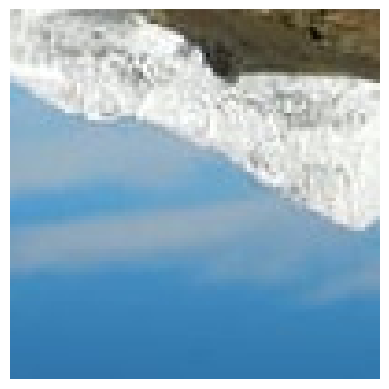

In [15]:
slika7 = plt.imread("./Landscape_test/primer_7.jpg")
plt.figure()
plt.imshow(slika7)
plt.axis("off")
plt.show()

In [23]:
orientacija_horizonta(slika7)

0.6163884320334405

## PRIMER 8 EXP: -PI/4 = -0,785

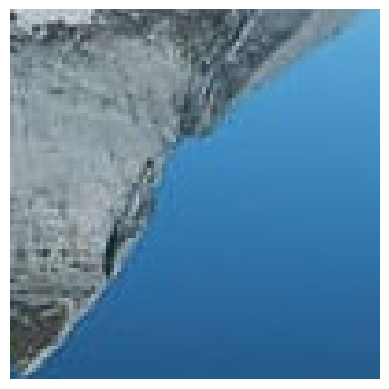

In [16]:
slika8 = plt.imread("./Landscape_test/primer_8.jpg")
plt.figure()
plt.imshow(slika8)
plt.axis("off")
plt.show()

In [24]:
orientacija_horizonta(slika8)

-0.01988349780753018

## PRIMER 9 EXP: 0

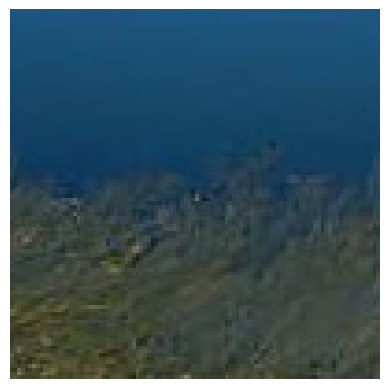

In [17]:
slika9 = plt.imread("./Landscape_test/primer_9.jpg")
plt.figure()
plt.imshow(slika9)
plt.axis("off")
plt.show()

In [25]:
orientacija_horizonta(slika9)

-0.01988349780753018

## PRIMER 10 EXP: -PI/4 = -0,785

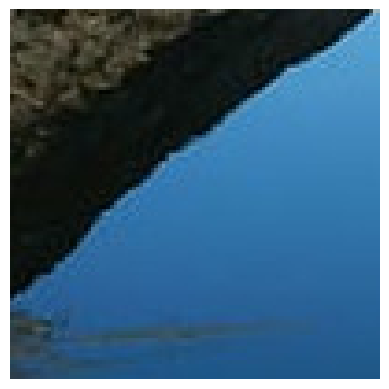

In [18]:
slika10 = plt.imread("./Landscape_test/primer_10.jpg")
plt.figure()
plt.imshow(slika10)
plt.axis("off")
plt.show()

In [26]:
orientacija_horizonta(slika10)

-0.4970874451882583

## PRIMER 11 EXP: PI/4 ali 0

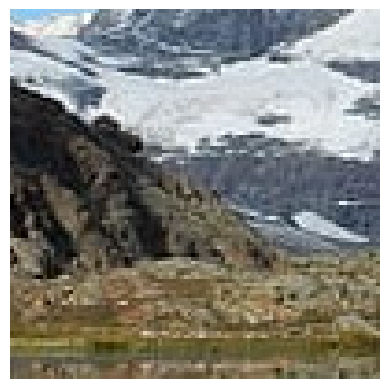

In [4]:
slika11 = plt.imread("./Landscape_test/primer_11.jpg")
plt.figure()
plt.imshow(slika11)
plt.axis("off")
plt.show()

In [5]:
orientacija_horizonta(slika11)

-0.01988349780753018

## PRIMERI IZREZANIH REGIJ S POMOČJO PYTHONA:

### KOORDINATE LEVIH ZGORNJIH KOTOV IZBRANIH REGIJ

In [3]:
top_left_coords = [
    (47, 192),  
    (462, 245),
    (765, 398),
    (51, 439),
    (631, 407)
]

### PRIMER 1 EXP: PI/4

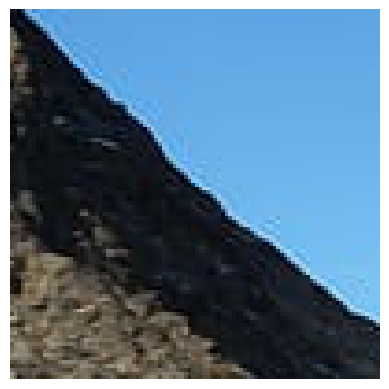

In [20]:
x_1, y_1 = top_left_coords[0]
# Define the bottom-right corner by adding 100 to x and y
cropped_region_1 = slika[y_1:y_1+100, x_1:x_1+100]
plt.figure()
plt.imshow(cropped_region_1)
plt.axis("off")
plt.show()

In [9]:
orientacija_horizonta(cropped_region_1)

0.6163884320334405

### PRIMER 2 EXP: 0

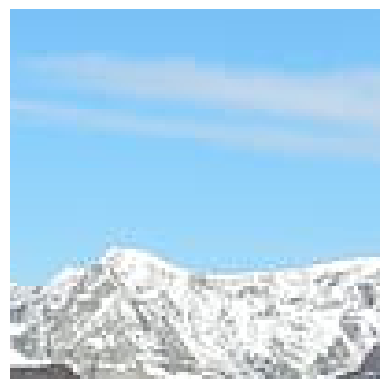

In [21]:
x_2, y_2 = top_left_coords[1]
cropped_region_2 = slika[y_2:y_2+100, x_2:x_2+100]
plt.figure()
plt.imshow(cropped_region_2)
plt.axis("off")
plt.show()

In [25]:
orientacija_horizonta(cropped_region_2)

0.019883497807530404

### PRIMER 3 EXP: 0

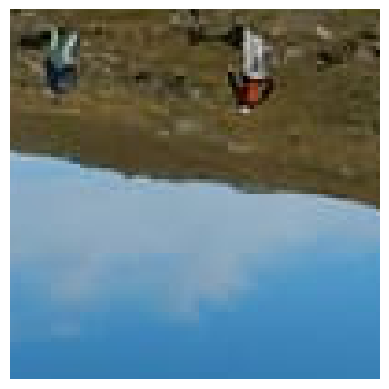

In [28]:
x_3, y_3 = top_left_coords[2]

cropped_region_3 = slika[y_3:y_3+100, x_3:x_3+100]
plt.figure()
plt.imshow(cropped_region_3)
plt.axis("off")
plt.show()

In [29]:
orientacija_horizonta(cropped_region_3)

0.1789514802677732

### PRIMER 4 EXP: -PI/4 oz. 0,785

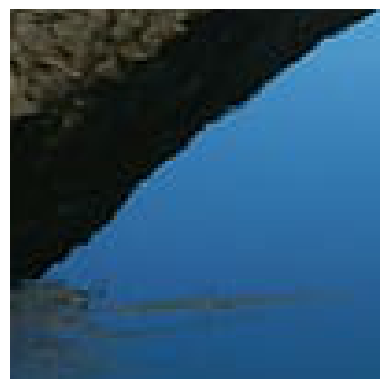

In [27]:
x_4, y_4 = top_left_coords[3]

cropped_region_4 = slika[y_4:y_4+100, x_4:x_4+100]
plt.figure()
plt.imshow(cropped_region_4)
plt.axis("off")
plt.show()

In [30]:
orientacija_horizonta(cropped_region_4)

-0.5368544408033189

### PRIMER 5 EXP: PI/4 oz. 0,785

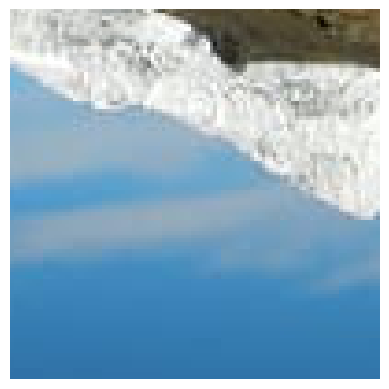

In [31]:
x_5, y_5 = top_left_coords[4]

cropped_region_5 = slika[y_5:y_5+100, x_5:x_5+100]
plt.figure()
plt.imshow(cropped_region_5)
plt.axis("off")
plt.show()

In [32]:
orientacija_horizonta(cropped_region_5)

0.6561554276485011